# Support Vector Machines


In [57]:
# globals
CV_FOLDS = 10
N_JOBS = 1

In [58]:
# import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.decomposition import PCA
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.pipeline import Pipeline
import sklearn 
print (sklearn.__version__)

import warnings
warnings.simplefilter(action='once', category=FutureWarning)

0.20.1


In [59]:
# import data
def import_data(data):    
    return pd.read_csv("train_test_data/" + data + ".csv", index_col="uid").drop("Unnamed: 0", axis="columns")        
X_train = import_data("X_train")
X_test = import_data("X_test")
y_train = import_data("y_train")
y_test = import_data("y_test")

In [60]:
X_train.head()
X_test.head()
y_train.head()
y_test.head()

chargetime_count_wk_1  chargetime_count_wk_2  chargetime_count_wk_3  \
uid                                                                        
u00                     75                     65                     60   
u01                     44                     39                     36   
u02                    105                     98                     88   
u04                     60                     54                     46   
u08                    107                    102                     92   

     chargetime_count_wk_4  chargetime_count_wk_5  chargetime_count_wk_6  \
uid                                                                        
u00                     47                     31                     18   
u01                     29                     23                     19   
u02                     76                     62                     49   
u04                     41                     31                     23   
u08                     79                     62                     50   

     chargetime_count_wk_7  chargetime_count_wk_8  chargetime_count_wk_9  \
uid                                                                        
u00                     12                      7                      3   
u01                     12                     10                      5   
u02                     38                     30                     19   
u04                     14                      8                      2   
u08                     38                     28                     17   

     chargetime_count_wk_10        ...          locktime_q3_wk_1  \
uid                                ...                             
u00                       1        ...                  10751.25   
u01                       3        ...                  21632.50   
u02                       4        ...                  14639.50   
u04                       0        ...                  22332.00   
u08                       6        ...                  10007.50   

     locktime_q3_wk_2  locktime_q3_wk_3  locktime_q3_wk_4  locktime_q3_wk_5  \
uid                                                                           
u00           10827.5          10827.50          10924.25          10880.75   
u01           21658.0          21624.00          24227.00          25298.00   
u02           14191.5          14451.00          14502.50          14896.00   
u04           22375.5          22700.75          22718.00          23324.00   
u08           10044.5           9948.00           9989.00           9918.00   

     locktime_q3_wk_6  locktime_q3_wk_7  locktime_q3_wk_8  locktime_q3_wk_9  \
uid                                                                           
u00          10848.50           10473.0            9785.0           9555.50   
u01          23310.00           20985.0           21298.0          15541.25   
u02          17611.75           14191.5           14777.5          18333.00   
u04          23942.00           24879.0           25229.0          26646.00   
u08           9761.00            9903.0            9933.0           9989.00   

     locktime_q3_wk_10  
uid                     
u00             6308.0  
u01             9186.5  
u02            14254.5  
u04                NaN  
u08             8869.5  

[5 rows x 480 columns]

chargetime_count_wk_1  chargetime_count_wk_2  chargetime_count_wk_3  \
uid                                                                        
u03                     47                     41                     37   
u27                     73                     67                     52   
u05                     72                     68                     61   
u43                     69                     69                     57   
u56                     39                     32                     21   

     chargetime_count_wk_4  chargetime_count_wk_5  chargetime_count_wk_6  \
uid                                                                        
u03                     30                     21                     10   
u27                     47                     38                     31   
u05                     48                     38                     29   
u43                     49                     44                     35   
u56                     18                     15                     13   

     chargetime_count_wk_7  chargetime_count_wk_8  chargetime_count_wk_9  \
uid                                                                        
u03                      6                      1                      0   
u27                     19                     18                     12   
u05                     18                     14                     10   
u43                     25                     21                     14   
u56                      9                      9                      6   

     chargetime_count_wk_10        ...          locktime_q3_wk_1  \
uid                                ...                             
u03                       0        ...                  24734.50   
u27                       8        ...                  13938.00   
u05                       4        ...                  18138.25   
u43                       7        ...                  16965.25   
u56                       3        ...                  20992.00   

     locktime_q3_wk_2  locktime_q3_wk_3  locktime_q3_wk_4  locktime_q3_wk_5  \
uid                                                                           
u03          28016.00          28016.00          24631.00          25801.00   
u27          14609.75          13951.00          14491.00          14349.50   
u05          18786.25          19550.75          20192.00          25011.50   
u43          16965.25          17061.00          17221.25          17900.75   
u56          21379.75          22694.75          23458.00          23239.25   

     locktime_q3_wk_6  locktime_q3_wk_7  locktime_q3_wk_8  locktime_q3_wk_9  \
uid                                                                           
u03          17806.00          16529.50           17806.0            5735.0   
u27          18096.25          18459.25           19254.0           19097.5   
u05          22830.50          17359.75           17141.5           17448.5   
u43          21970.00          24245.25           22225.0           18883.0   
u56          25084.25          24099.00           24099.0           26136.0   

     locktime_q3_wk_10  
uid                     
u03                NaN  
u27           18793.25  
u05           16834.25  
u43            9766.50  
u56           24657.50  

[5 rows x 480 columns]

panas_pos_raw_pre  panas_neg_raw_pre  flourishing_scale_raw_pre  \
uid                                                                    
u00               32.0                NaN                        NaN   
u01               30.0               19.0                       45.0   
u02               23.0               15.0                       46.0   
u04               27.0               14.0                       27.0   
u08               30.0               26.0                        NaN   

     panas_pos_imp_pre  panas_neg_imp_pre  flourishing_scale_imp_pre  \
uid                                                                    
u00               32.0               33.0                       49.0   
u01               30.0               19.0                       45.0   
u02               23.0               15.0                       46.0   
u04               27.0               14.0                       27.0   
u08               30.0               26.0                       38.0   

     panas_pos_raw_class_pre  panas_neg_raw_class_pre  \
uid                                                     
u00                      1.0                      NaN   
u01                      1.0                      1.0   
u02                      0.0                      0.0   
u04                      0.0                      0.0   
u08                      1.0                      1.0   

     flourishing_scale_raw_class_pre  panas_pos_imp_class_pre  \
uid                                                             
u00                              NaN                      1.0   
u01                              1.0                      1.0   
u02                              1.0                      0.0   
u04                              0.0                      0.0   
u08                              NaN                      1.0   

                   ...                 flourishing_scale_raw_post  \
uid                ...                                              
u00                ...                                       45.0   
u01                ...                                       46.0   
u02                ...                                       44.0   
u04                ...                                       33.0   
u08                ...                                        NaN   

     panas_pos_imp_post  panas_neg_imp_post  flourishing_scale_imp_post  \
uid                                                                       
u00                31.0                24.0                        45.0   
u01                27.0                17.0                        46.0   
u02                28.0                13.0                        44.0   
u04                34.0                19.0                        33.0   
u08                 NaN                 NaN                         NaN   

     panas_pos_raw_class_post  panas_neg_raw_class_post  \
uid                                                       
u00                       1.0                       1.0   
u01                       0.0                       0.0   
u02                       0.0                       0.0   
u04                       1.0                       1.0   
u08                       NaN                       NaN   

     flourishing_scale_raw_class_post  panas_pos_imp_class_post  \
uid                                                               
u00                               1.0                       1.0   
u01                               1.0                       0.0   
u02                               0.0                       0.0   
u04                               0.0                       1.0   
u08                               NaN                       NaN   

     panas_neg_imp_class_post  flourishing_scale_imp_class_post  
uid                                                              
u00                       1.0                               1.0  
u01                       0.0                  

panas_pos_raw_pre  panas_neg_raw_pre  flourishing_scale_raw_pre  \
uid                                                                    
u03               30.0               27.0                       34.0   
u27               23.0               18.0                       31.0   
u05               32.0               27.0                       48.0   
u43               31.0               18.0                       47.0   
u56               22.0                9.0                       46.0   

     panas_pos_imp_pre  panas_neg_imp_pre  flourishing_scale_imp_pre  \
uid                                                                    
u03               30.0               27.0                       34.0   
u27               23.0               18.0                       31.0   
u05               32.0               27.0                       48.0   
u43               31.0               18.0                       47.0   
u56               22.0                9.0                       46.0   

     panas_pos_raw_class_pre  panas_neg_raw_class_pre  \
uid                                                     
u03                      1.0                      1.0   
u27                      0.0                      0.0   
u05                      1.0                      1.0   
u43                      1.0                      0.0   
u56                      0.0                      0.0   

     flourishing_scale_raw_class_pre  panas_pos_imp_class_pre  \
uid                                                             
u03                              0.0                      1.0   
u27                              0.0                      0.0   
u05                              1.0                      1.0   
u43                              1.0                      1.0   
u56                              1.0                      0.0   

                   ...                 flourishing_scale_raw_post  \
uid                ...                                              
u03                ...                                       31.0   
u27                ...                                       31.0   
u05                ...                                       50.0   
u43                ...                                       42.0   
u56                ...                                       48.0   

     panas_pos_imp_post  panas_neg_imp_post  flourishing_scale_imp_post  \
uid                                                                       
u03                25.0                20.0                        31.0   
u27                19.0                23.0                        31.0   
u05                33.0                17.0                        50.0   
u43                32.0                21.0                        42.0   
u56                29.0                15.0                        48.0   

     panas_pos_raw_class_post  panas_neg_raw_class_post  \
uid                                                       
u03                       0.0                       1.0   
u27                       0.0                       1.0   
u05                       1.0                       0.0   
u43                       1.0                       1.0   
u56                       1.0                       0.0   

     flourishing_scale_raw_class_post  panas_pos_imp_class_post  \
uid                                                               
u03                               0.0                       0.0   
u27                               0.0                       0.0   
u05                               1.0                       1.0   
u43                               0.0                       1.0   
u56                               1.0                       1.0   

     panas_neg_imp_class_post  flourishing_scale_imp_class_post  
uid                                                              
u03                       1.0                               0.0  
u27                       1.0                  

# EDA

In [61]:
y_train.describe()

panas_pos_raw_pre  panas_neg_raw_pre  flourishing_scale_raw_pre  \
count          36.000000          34.000000                  33.000000   
mean           28.500000          19.382353                  42.636364   
std             6.235841           7.781153                   9.266263   
min            13.000000          10.000000                  15.000000   
25%            25.750000          14.000000                  41.000000   
50%            29.000000          17.500000                  45.000000   
75%            32.250000          21.750000                  49.000000   
max            42.000000          43.000000                  54.000000   

       panas_pos_imp_pre  panas_neg_imp_pre  flourishing_scale_imp_pre  \
count          37.000000          37.000000                  37.000000   
mean           28.513514          19.810811                  42.972973   
std             6.149172           7.978575                   9.114965   
min            13.000000          10.000000                  15.000000   
25%            26.000000          14.000000                  40.000000   
50%            29.000000          18.000000                  45.000000   
75%            32.000000          25.000000                  49.000000   
max            42.000000          43.000000                  56.000000   

       panas_pos_raw_class_pre  panas_neg_raw_class_pre  \
count                36.000000                34.000000   
mean                  0.527778                 0.441176   
std                   0.506309                 0.503995   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   1.000000                 0.000000   
75%                   1.000000                 1.000000   
max                   1.000000                 1.000000   

       flourishing_scale_raw_class_pre  panas_pos_imp_class_pre  \
count                        33.000000                37.000000   
mean                          0.545455                 0.540541   
std                           0.505650                 0.505228   
min                           0.000000                 0.000000   
25%                           0.000000                 0.000000   
50%                           1.000000                 1.000000   
75%                           1.000000                 1.000000   
max                           1.000000                 1.000000   

                     ...                 flourishing_scale_raw_post  \
count                ...                                  28.000000   
mean                 ...                                  43.178571   
std                  ...                                   9.412575   
min                  ...                                  16.000000   
25%                  ...                                  40.500000   
50%                  ...                                  44.500000   
75%                  ...                                  48.250000   
max                  ...                                  56.000000   

       panas_pos_imp_post  panas_neg_imp_post  flourishing_scale_imp_post  \
count           30.000000           30.000000                   28.000000   
mean            29.600000           21.766667                   43.178571   
std              6.881259            8.067317                    9.412575   
min             17.000000           11.000000                   16.000000   
25%             25.250000           15.000000                   40.500000   
50%             31.000000           20.000000                   44.500000   
75%             34.000000           27.500000                   48.250000   
max             43.000000           37.000000                   56.000000   

       panas_pos_raw_class_post  panas_neg_raw_class_post  \
count                 29.000000                 30.000000   
mean                   0.517241                  0.566667   
std                 

In [62]:
y_train.columns

Index(['panas_pos_raw_pre', 'panas_neg_raw_pre', 'flourishing_scale_raw_pre',
       'panas_pos_imp_pre', 'panas_neg_imp_pre', 'flourishing_scale_imp_pre',
       'panas_pos_raw_class_pre', 'panas_neg_raw_class_pre',
       'flourishing_scale_raw_class_pre', 'panas_pos_imp_class_pre',
       'panas_neg_imp_class_pre', 'flourishing_scale_imp_class_pre',
       'panas_pos_raw_post', 'panas_neg_raw_post',
       'flourishing_scale_raw_post', 'panas_pos_imp_post',
       'panas_neg_imp_post', 'flourishing_scale_imp_post',
       'panas_pos_raw_class_post', 'panas_neg_raw_class_post',
       'flourishing_scale_raw_class_post', 'panas_pos_imp_class_post',
       'panas_neg_imp_class_post', 'flourishing_scale_imp_class_post'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B250129B0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2502ACF8>]],
      dtype=object)

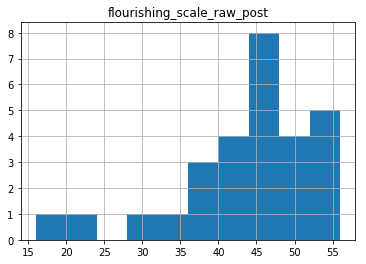

In [63]:
y_train.loc[:, ['flourishing_scale_imp_class_pre']].hist()
y_train.loc[:, ['flourishing_scale_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B24FB9C88>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B24FB9A90>]],
      dtype=object)

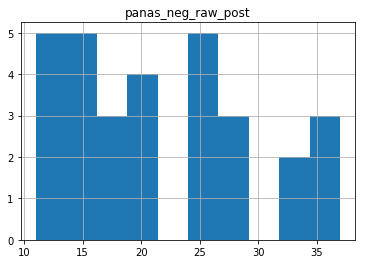

In [64]:
y_train.loc[:, ['panas_neg_raw_pre']].hist()
y_train.loc[:, ['panas_neg_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B250C3FD0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B25042588>]],
      dtype=object)

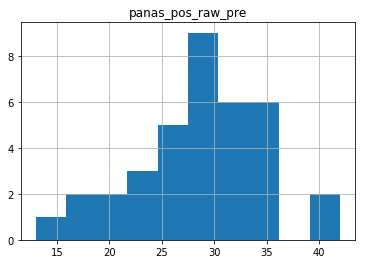

In [65]:
y_train.loc[:, ['panas_pos_raw_post']].hist()
y_train.loc[:, ['panas_pos_raw_pre']].hist()

# Pre-processing

In [66]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# imputer = SimpleImputer(strategy="most_frequent")
# scaler = StandardScaler()

# X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

X_train.head()
X_train.describe()

chargetime_count_wk_1  chargetime_count_wk_2  chargetime_count_wk_3  \
uid                                                                        
u00                     75                     65                     60   
u01                     44                     39                     36   
u02                    105                     98                     88   
u04                     60                     54                     46   
u08                    107                    102                     92   

     chargetime_count_wk_4  chargetime_count_wk_5  chargetime_count_wk_6  \
uid                                                                        
u00                     47                     31                     18   
u01                     29                     23                     19   
u02                     76                     62                     49   
u04                     41                     31                     23   
u08                     79                     62                     50   

     chargetime_count_wk_7  chargetime_count_wk_8  chargetime_count_wk_9  \
uid                                                                        
u00                     12                      7                      3   
u01                     12                     10                      5   
u02                     38                     30                     19   
u04                     14                      8                      2   
u08                     38                     28                     17   

     chargetime_count_wk_10        ...          locktime_q3_wk_1  \
uid                                ...                             
u00                       1        ...                  10751.25   
u01                       3        ...                  21632.50   
u02                       4        ...                  14639.50   
u04                       0        ...                  22332.00   
u08                       6        ...                  10007.50   

     locktime_q3_wk_2  locktime_q3_wk_3  locktime_q3_wk_4  locktime_q3_wk_5  \
uid                                                                           
u00           10827.5          10827.50          10924.25          10880.75   
u01           21658.0          21624.00          24227.00          25298.00   
u02           14191.5          14451.00          14502.50          14896.00   
u04           22375.5          22700.75          22718.00          23324.00   
u08           10044.5           9948.00           9989.00           9918.00   

     locktime_q3_wk_6  locktime_q3_wk_7  locktime_q3_wk_8  locktime_q3_wk_9  \
uid                                                                           
u00          10848.50           10473.0            9785.0           9555.50   
u01          23310.00           20985.0           21298.0          15541.25   
u02          17611.75           14191.5           14777.5          18333.00   
u04          23942.00           24879.0           25229.0          26646.00   
u08           9761.00            9903.0            9933.0           9989.00   

     locktime_q3_wk_10  
uid                     
u00             6308.0  
u01             9186.5  
u02            14254.5  
u04                NaN  
u08             8869.5  

[5 rows x 480 columns]

chargetime_count_wk_1  chargetime_count_wk_2  chargetime_count_wk_3  \
count               40.00000              40.000000              40.000000   
mean                69.92500              64.825000              57.150000   
std                 34.36112              32.503954              29.627214   
min                  1.00000               1.000000               0.000000   
25%                 47.75000              42.750000              35.750000   
50%                 67.00000              61.000000              54.000000   
75%                 87.25000              79.750000              70.500000   
max                154.00000             145.000000             130.000000   

       chargetime_count_wk_4  chargetime_count_wk_5  chargetime_count_wk_6  \
count              40.000000              40.000000              40.000000   
mean               48.700000              39.750000              30.175000   
std                26.182006              22.255797              18.395774   
min                 0.000000               0.000000               0.000000   
25%                31.750000              28.750000              20.500000   
50%                44.500000              35.500000              27.000000   
75%                62.250000              51.500000              40.250000   
max               117.000000             101.000000              78.000000   

       chargetime_count_wk_7  chargetime_count_wk_8  chargetime_count_wk_9  \
count              40.000000              40.000000              40.000000   
mean               23.375000              16.925000              10.625000   
std                16.060283              13.858974               9.818056   
min                 0.000000               0.000000               0.000000   
25%                12.000000               7.000000               3.000000   
50%                21.000000              15.000000              10.000000   
75%                31.500000              21.500000              15.250000   
max                74.000000              70.000000              49.000000   

       chargetime_count_wk_10        ...          locktime_q3_wk_1  \
count               40.000000        ...                 40.000000   
mean                 4.350000        ...              15484.581250   
std                  4.329683        ...               4244.856597   
min                  0.000000        ...               9093.500000   
25%                  1.000000        ...              11844.500000   
50%                  4.000000        ...              15522.375000   
75%                  6.000000        ...              17178.312500   
max                 21.000000        ...              27303.250000   

       locktime_q3_wk_2  locktime_q3_wk_3  locktime_q3_wk_4  locktime_q3_wk_5  \
count         40.000000         40.000000         40.000000         40.000000   
mean       15394.412500      15327.656250      15482.525000      15914.237500   
std         4536.123168       4261.853705       4329.152417       4867.418336   
min         9310.250000       8876.500000       8715.000000       8597.000000   
25%        11407.937500      11438.375000      11902.625000      12197.875000   
50%        15497.000000      15404.750000      15046.500000      14801.500000   
75%        17275.625000      17540.062500      18051.125000      18110.375000   
max        29325.250000      25642.500000      26184.000000      25706.000000   

       locktime_q3_wk_6  locktime_q3_wk_7  locktime_q3_wk_8  locktime_q3_wk_9  \
count         38.000000         38.000000         38.000000         38.000000   
mean       16174.302632      15789.644737      15566.782895      14774.980263   
std         5697.730009       5036.738170       5358.596751       5886.549104   
min         8007.000000       8007.000000       6791.000000       5024.750000   
25%        10982.312500      11083.125000      10599.250000      10209.437500   
50%        14533.375000      15262.500000      1483

# SVMs
grid search across
* PCA % variance retained
* all SVM hyperparameters

^ create a function that does this and repeat for all targets

In [67]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
def grid_search(estimator, param_grid, target, scoring, n_iter=50, cv=10, n_jobs=8, n_top=1, verbose=True):
    print("*" * 20, target, "*" * 20)
    imputer = SimpleImputer()
    scaler = StandardScaler()
    pca = PCA()
    pipe = Pipeline(steps=[('imputer', imputer), ('scaler', scaler), ('pca', pca), ('SVM', estimator)])

    # train using only labelled data
    target_not_null = np.logical_not(y_train.loc[:, target].isnull())

    # run randomized search
    random_search = RandomizedSearchCV(pipe, param_distributions=param_grid,
                                       n_iter=n_iter, cv=cv, iid=False, n_jobs=n_jobs, scoring=scoring)
    random_search.fit(X_train[target_not_null], y_train[target_not_null].loc[:, target])

    # print results
    if verbose:
        report(random_search.cv_results_, n_top=n_top) 

    return random_search.best_estimator_  

In [79]:
N_ITER = 100_000
N_JOBS = 8
MAX_ITER = 100_000

param_grid = {
    "imputer__strategy":["most_frequent", "mean", "median"],    
    "pca__n_components": [0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99],  # proportion of total variation
    "SVM__C": [0.0001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    "SVM__kernel": ["linear", "rbf", "poly"],
    "SVM__gamma": [0.01, 0.1, 1, 10, 100],
    "SVM__degree": [2, 3, 4, 5, 6]
}

# flourishing
svc_gs_flour_class_pre = grid_search(SVC(gamma="auto", max_iter=MAX_ITER, probability=True), param_grid, "flourishing_scale_imp_class_pre",
                   "neg_log_loss", n_jobs=N_JOBS)
svr_gs_flour_pre = grid_search(SVR(gamma="auto", max_iter=MAX_ITER), param_grid, "flourishing_scale_imp_pre",
                   "neg_mean_squared_error", n_jobs=N_JOBS)

******************** flourishing_scale_imp_class_pre ********************
Model with rank: 1
Mean validation score: -0.630 (std: 0.082)
Parameters: {'pca__n_components': 0.9, 'imputer__strategy': 'median', 'SVM__kernel': 'poly', 'SVM__gamma': 0.1, 'SVM__degree': 4, 'SVM__C': 10}

******************** flourishing_scale_imp_pre ********************
Model with rank: 1
Mean validation score: -81.185 (std: 88.872)
Parameters: {'pca__n_components': 0.6, 'imputer__strategy': 'most_frequent', 'SVM__kernel': 'rbf', 'SVM__gamma': 1, 'SVM__degree': 2, 'SVM__C': 1}



In [80]:
# panas
svc_gs_panas_pos_class_pre = grid_search(SVC(gamma="auto", max_iter=MAX_ITER, probability=True), param_grid, "panas_pos_imp_class_pre",
                   "neg_log_loss", n_jobs=N_JOBS)
svr_gs_panas_pos_pre = grid_search(SVR(gamma="auto", max_iter=MAX_ITER), param_grid, "panas_pos_imp_pre",
                   "neg_mean_squared_error", n_jobs=N_JOBS)
svc_gs_panas_pos_class_post = grid_search(SVC(gamma="auto", max_iter=MAX_ITER, probability=True), param_grid, "panas_pos_imp_class_post",
                   "neg_log_loss", n_jobs=N_JOBS)
svr_gs_panas_pos_post = grid_search(SVR(gamma="auto", max_iter=MAX_ITER), param_grid, "panas_pos_imp_post",
                   "neg_mean_squared_error", n_jobs=N_JOBS)
svc_gs_panas_neg_class_pre = grid_search(SVC(gamma="auto", max_iter=MAX_ITER, probability=True), param_grid, "panas_neg_imp_class_pre",
                   "neg_log_loss", n_jobs=N_JOBS)
svr_gs_panas_neg_pre = grid_search(SVR(gamma="auto", max_iter=MAX_ITER), param_grid, "panas_neg_imp_pre",
                   "neg_mean_squared_error", n_jobs=N_JOBS)
svc_gs_panas_neg_class_post = grid_search(SVC(gamma="auto", max_iter=MAX_ITER, probability=True), param_grid, "panas_neg_imp_class_post",
                   "neg_log_loss", n_jobs=N_JOBS)
svr_gs_panas_neg_post = grid_search(SVR(gamma="auto", max_iter=MAX_ITER), param_grid, "panas_neg_imp_post",
                   "neg_mean_squared_error", n_jobs=N_JOBS)

******************** panas_pos_imp_class_pre ********************
Model with rank: 1
Mean validation score: -0.632 (std: 0.073)
Parameters: {'pca__n_components': 0.95, 'imputer__strategy': 'most_frequent', 'SVM__kernel': 'poly', 'SVM__gamma': 1, 'SVM__degree': 6, 'SVM__C': 1000}

******************** panas_pos_imp_pre ********************
Model with rank: 1
Mean validation score: -31.186 (std: 39.927)
Parameters: {'pca__n_components': 0.7, 'imputer__strategy': 'most_frequent', 'SVM__kernel': 'linear', 'SVM__gamma': 100, 'SVM__degree': 4, 'SVM__C': 0.01}

******************** panas_pos_imp_class_post ********************
Model with rank: 1
Mean validation score: -0.665 (std: 0.064)
Parameters: {'pca__n_components': 0.99, 'imputer__strategy': 'most_frequent', 'SVM__kernel': 'poly', 'SVM__gamma': 100, 'SVM__degree': 5, 'SVM__C': 100}

******************** panas_pos_imp_post ********************
Model with rank: 1
Mean validation score: -49.105 (std: 24.457)
Parameters: {'pca__n_components